# Deep Learning Project Milestone 1
## Loading the data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
import random
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


c:\Users\tsugu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_anno = 'annotations/dhd_pedestrian_traffic_train.json'
test_anno = 'annotations/dhd_pedestrian_traffic_val.json'

train_image_dir = "images/train/"
test_image_dir = "images/val/"

coco_train = COCO(train_anno)
coco_test = COCO(test_anno)

random.seed(123)

loading annotations into memory...
Done (t=1.69s)
creating index...
index created!
loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


## Size of the dataset

In [3]:
train_rate = 0.8

train_valid_imgIds = coco_train.getImgIds();
random.shuffle(train_valid_imgIds)

train_imgIds = train_valid_imgIds[:int(train_rate * len(train_valid_imgIds))]
valid_imgIds = train_valid_imgIds[int(train_rate * len(train_valid_imgIds)):]
test_imgIds = coco_test.getImgIds();

print("Number of pictures in the train data     :", len(train_imgIds))
print("Number of pictures in the validation data:", len(valid_imgIds))
print("Number of pictures in the test data      :", len(test_imgIds))

Number of pictures in the train data     : 11086
Number of pictures in the validation data: 2772
Number of pictures in the test data      : 2136


In [4]:
sample_rate = 0.01

X_train_imgIds = random.sample(train_imgIds, int(len(train_imgIds) * sample_rate))
X_train = [io.imread('%s/%s'%(train_image_dir, str(img_id) + ".jpg")) for img_id in X_train_imgIds]

X_valid_imgIds = random.sample(valid_imgIds, int(len(valid_imgIds) * sample_rate))
X_valid = [io.imread('%s/%s'%(train_image_dir, str(img_id) + ".jpg")) for img_id in X_valid_imgIds]

X_test_imgIds = random.sample(test_imgIds, int(len(test_imgIds) * sample_rate))
X_test = [io.imread('%s/%s'%(test_image_dir, str(img_id) + ".jpg")) for img_id in X_test_imgIds]

print("Number of train pictures used     :", len(X_train))
print("Number of validation pictures used:", len(X_valid))
print("Number of test pictures used      :", len(X_test))

Number of train pictures used     : 110
Number of validation pictures used: 27
Number of test pictures used      : 21


In [5]:
def show_image(img_type, image_id, image, show_anns=True):
    coco = None
    
    if img_type == "train":
        coco = coco_train
    elif img_type == "valid":
        coco = coco_train
    elif img_type == "test":
        coco = coco_test
    else:
        raise ValueError("Unknown image type")
    
    plt.axis('off')
    plt.imshow(image)
    if show_anns:
        annIds = coco.getAnnIds(imgIds=image_id)
        anns = coco.loadAnns(annIds)
        coco.showAnns(anns)
        print(anns[0])

{'id': 73105, 'image_id': 1499571160348, 'segmentation': [[875.859, 617.727, 875.859, 731.6179999999999, 936.0349, 731.6179999999999, 936.0349, 617.727]], 'iscrowd': 1, 'ignore': 1, 'category_id': 1, 'vis': 0, 'area': 7028.560326899993, 'bbox': [875.8590087890625, 617.7269897460938, 61.1759033203125, 114.8909912109375], 'height': 115, 'vis_ratio': 1.0}


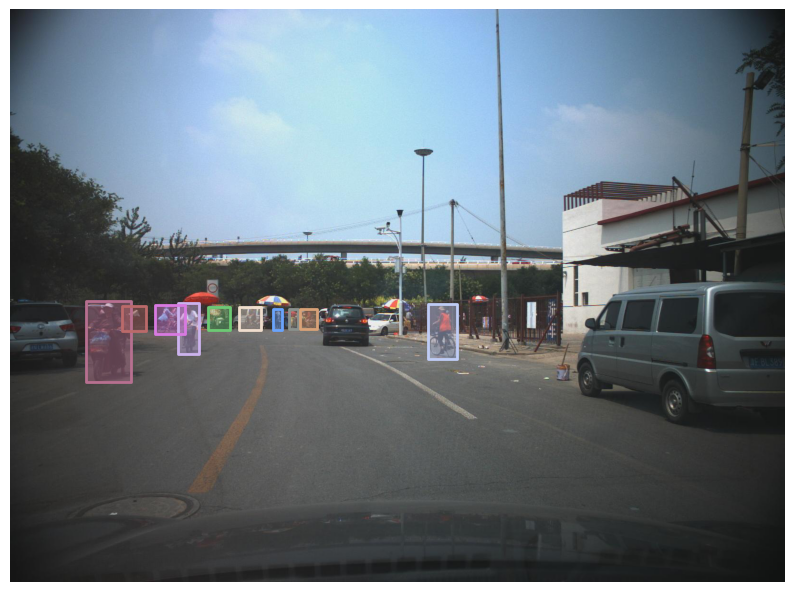

In [6]:
show_image("train", X_train_imgIds[0], X_train[0])

## Sample Training Data

{'id': 73105, 'image_id': 1499571160348, 'segmentation': [[875.859, 617.727, 875.859, 731.6179999999999, 936.0349, 731.6179999999999, 936.0349, 617.727]], 'iscrowd': 1, 'ignore': 1, 'category_id': 1, 'vis': 0, 'area': 7028.560326899993, 'bbox': [875.8590087890625, 617.7269897460938, 61.1759033203125, 114.8909912109375], 'height': 115, 'vis_ratio': 1.0}
{'id': 87389, 'image_id': 1497397398542, 'segmentation': [[53.0877, 586.688, 53.0877, 740.8679999999999, 121.5101, 740.8679999999999, 121.5101, 586.688]], 'iscrowd': 1, 'ignore': 1, 'category_id': 1, 'vis': 0, 'area': 10772.968031999995, 'bbox': [53.08769989013672, 586.68798828125, 69.42240142822266, 155.17999267578125], 'height': 155, 'vis_ratio': 1.0}
{'id': 61918, 'image_id': 1497478086784, 'segmentation': [[600.017, 608.63, 600.017, 682.2732, 633.4677, 682.2732, 633.4677, 608.63]], 'iscrowd': 1, 'ignore': 1, 'category_id': 1, 'vis': 0, 'area': 2571.510490239998, 'bbox': [600.0170288085938, 608.6300048828125, 34.45068359375, 74.643188

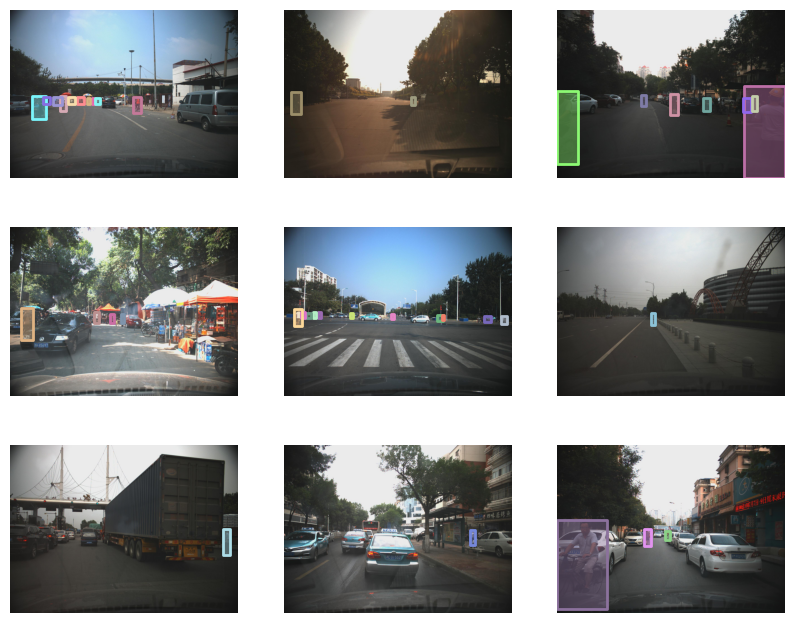

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
columns = 3
rows = 3
for i in range(0, columns*rows):
    if i >= 9:
      break
    img = X_train[i]
    img_id = X_train_imgIds[i]
    fig.add_subplot(rows, columns, i + 1)
    show_image("train", img_id, img)
plt.show()

## Sample Validation Data

{'id': 42188, 'image_id': 1499434791836, 'segmentation': [[493.523, 605.073, 493.523, 778.158, 566.8895, 778.158, 566.8895, 605.073]], 'iscrowd': 0, 'ignore': 0, 'category_id': 1, 'vis': 0, 'area': 12946.092152499998, 'bbox': [493.52301025390625, 605.072998046875, 74.36651611328125, 174.08502197265625], 'height': 174, 'vis_ratio': 1.0}
{'id': 55127, 'image_id': 1500005261833, 'segmentation': [[790.351, 574.591, 790.351, 903.577, 911.653, 903.577, 911.653, 574.591]], 'iscrowd': 1, 'ignore': 1, 'category_id': 1, 'vis': 0, 'area': 40357.94777200001, 'bbox': [790.3510131835938, 574.5910034179688, 122.302001953125, 329.98602294921875], 'height': 330, 'vis_ratio': 1.0}
{'id': 93247, 'image_id': 1497227385571, 'segmentation': [[555.0, 610.0, 555.0, 771.0, 700.0, 771.0, 700.0, 610.0]], 'iscrowd': 1, 'ignore': 1, 'category_id': 1, 'vis': 0, 'area': 23652.0, 'bbox': [555.0, 610.0, 146.0, 162.0], 'height': 162, 'vis_ratio': 1.0}
{'id': 6673, 'image_id': 1499768684807, 'segmentation': [[831.359, 6

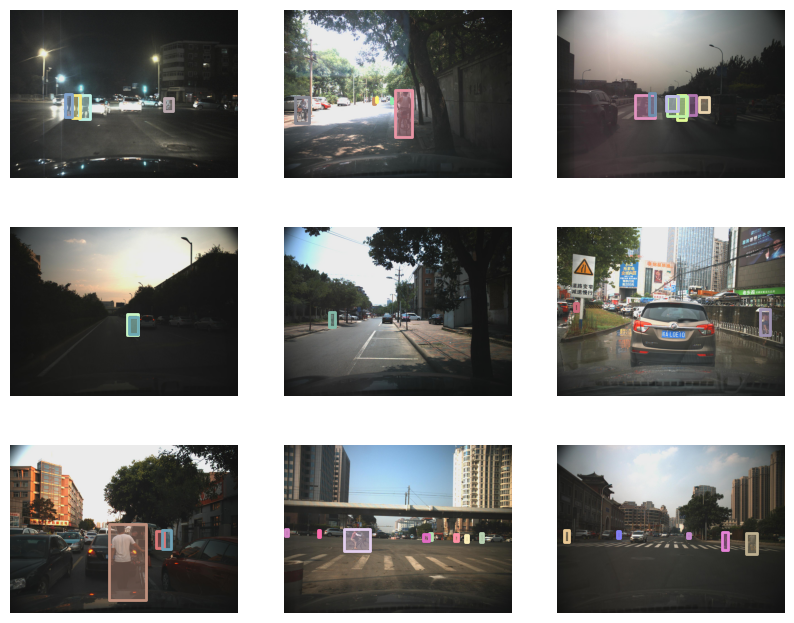

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
columns = 3
rows = 3
for i in range(0, columns*rows):
    if i >= 9:
      break
    img = X_valid[i]
    img_id = X_valid_imgIds[i]
    fig.add_subplot(rows, columns, i + 1)
    show_image("valid", img_id, img)
plt.show()

## Sample Test Data

{'id': 4829, 'image_id': 1497068617307, 'segmentation': [[1264.47, 605.364, 1264.47, 778.2280000000001, 1326.6934, 778.2280000000001, 1326.6934, 605.364]], 'iscrowd': 0, 'ignore': 0, 'category_id': 1, 'vis': 1, 'area': 10992.273217600017, 'bbox': [1264.469970703125, 605.364013671875, 63.223388671875, 173.864013671875], 'height': 174, 'vis_ratio': 0.7}
{'id': 4968, 'image_id': 1496889767716, 'segmentation': [[134.028, 602.007, 134.028, 761.8399999999999, 200.0418, 761.8399999999999, 200.0418, 602.007]], 'iscrowd': 1, 'ignore': 1, 'category_id': 1, 'vis': 0, 'area': 10778.030495399998, 'bbox': [134.0279998779297, 602.0070190429688, 67.0137939453125, 160.8330078125], 'height': 161, 'vis_ratio': 1.0}
{'id': 11733, 'image_id': 1497089856314, 'segmentation': [[596.565, 614.054, 596.565, 642.2021, 608.1959, 642.2021, 608.1959, 614.054]], 'iscrowd': 0, 'ignore': 0, 'category_id': 1, 'vis': 1, 'area': 368.1667362899999, 'bbox': [596.5650024414062, 614.0540161132812, 12.63092041015625, 29.148071

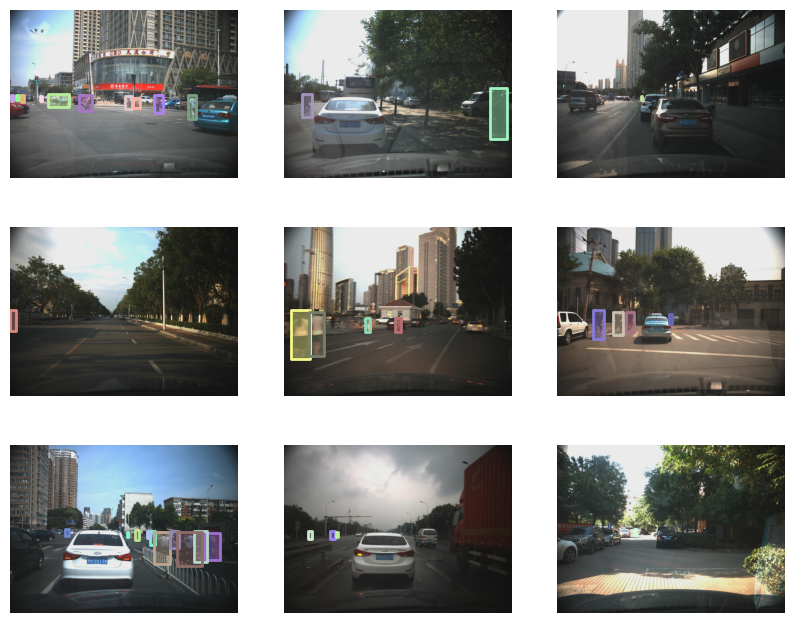

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
columns = 3
rows = 3
for i in range(0, columns*rows):
    if i >= 9:
      break
    img = X_test[i]
    img_id = X_test_imgIds[i]
    fig.add_subplot(rows, columns, i + 1)
    show_image("test", img_id, img)
plt.show()

In [23]:
X_train[0].shape

(1200, 1624, 3)

In [10]:
!pip freeze

absl-py==2.1.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
astunparse==1.6.3
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_161

In [12]:
import cv2

In [13]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(X_train[0])
ss.switchToSelectiveSearchFast()
rects = ss.process()

In [14]:
rects

array([[  79,  630,   49,   18],
       [1041,  498,   63,    2],
       [   0,   48,   64,  246],
       ...,
       [   0,  662, 1408,  538],
       [   0,  272, 1584,  593],
       [   0,  240, 1313,  657]])

In [15]:
len(rects)

10213